In [101]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
import labellines as ll

# Manually choose $x_0\sim x_T$

In [2]:
T = 8
x = np.array([[0,0],[0,1],[1,1],[2,1],[2,2],[2,3],[3,3],[4,3],[4,4]])

## Calculate $r_{ij}$ matrix

In [58]:
R=np.linalg.norm(x[:,np.newaxis,:]-x,axis=-1)
R+=np.random.randn(*R.shape)*0.01 # Add some random noise
R*=np.ones(R.shape)-np.eye(len(R)) # Remove the noise on the diagonal axis

In [59]:
print(R)

[[-0.          1.00221767  1.41903322  2.24321606  2.82692579  3.5908511
   4.24833532  5.00789817  5.65753532]
 [ 1.00199156 -0.          1.01220545  1.98757148  2.23978169  2.8320485
   3.60370394  4.47136894  4.99788367]
 [ 1.41158007  1.00995674 -0.          1.01165204  1.41813501  2.26302494
   2.82178069  3.6117155   4.24762566]
 [ 2.21901343  1.9970567   1.00671587  0.          0.99488667  1.99175904
   2.24231059  2.83596099  3.61253633]
 [ 2.80897185  2.24534847  1.40979022  1.01508147  0.          1.00717961
   1.40277179  2.23645169  2.84259482]
 [ 3.60411184  2.81996956  2.24086751  1.99247878  1.00304055 -0.
   0.98887528  2.00619859  2.24548708]
 [ 4.23807403  3.59444693  2.84097717  2.23459321  1.42274968  1.01762946
   0.          1.00832775  1.41053716]
 [ 4.99526172  4.47427209  3.62728406  2.84206042  2.23682461  1.99234365
   1.00534045 -0.          1.01183312]
 [ 5.66546896  4.99942776  4.23741217  3.58950678  2.83751436  2.22791943
   1.41860566  0.98852133  0.   

## Define the anchor points(known locations)

In [86]:
# The achor points: x_0 and x_1, are assumed to be known.
anchor_indices = [0,1,2]

anchors = x[anchor_indices,:]

unknown_index = range(2,9)

## Solve for a single unknown location using the anchor points

In [33]:
def substitution_multi_lateration(sensor_locs,rhat):
    '''
    sensor_locs: shape = (n_locs, space_dim)
    rhat: shape = (n_locs,)
    
    Find the single location determined by the known sensor locations(sensor_locs) and distance readings(rhat)
    
    The substituion method is used in finding the solution.
    '''
    
    A=2*(sensor_locs[-1,:]-sensor_locs[:-1,:])
    
    rfront=rhat[:-1]**2
    
    rback=rhat[-1]**2
    
    pback=np.sum(sensor_locs[-1,:]**2)
    
    pfront=np.sum(sensor_locs[:-1,:]**2,axis=1)
    
    B=rfront-rback+pback-pfront

    qhat=np.linalg.pinv(A).dot(B)

    return qhat

In [87]:
x_hat = np.array([substitution_multi_lateration(anchors,R[anchor_indices,u]) for u in unknown_index])

In [88]:
print(x)
print(x_hat)

[[0 0]
 [0 1]
 [1 1]
 [2 1]
 [2 2]
 [2 3]
 [3 3]
 [4 3]
 [4 4]]
[[1.01227994 0.9945477 ]
 [1.96350027 1.04078895]
 [2.00275755 1.9874437 ]
 [1.9496084  2.93685648]
 [3.01211791 3.03083545]
 [3.97432566 3.04295192]
 [3.96825872 4.01443236]]


## Visualize

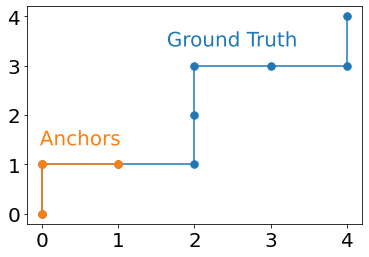

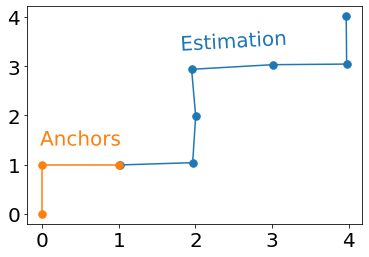

In [100]:
plt.rc('font',size=20)
plt.plot(x[:,0],x[:,1],marker = '.',markersize = 15,label='Ground Truth')
plt.plot(x[:3,0],x[0:3,1],marker = '.',markersize = 15,label='Anchors')
lines = plt.gca().get_lines()
ll.labelLine(lines[0],2.5,fontsize=20,zorder=3,yoffset=0.5)

ll.labelLine(lines[1],0.5,fontsize=20,zorder=3,yoffset=0.5)

plt.show()



plt.plot(x_hat[:,0],x_hat[:,1],marker = '.',markersize = 15,label='Estimation')
plt.plot(x[:3,0],x[0:3,1],marker = '.',markersize = 15,label='Anchors')

# ll.labelLines(plt.gca().get_lines(),fontsize=20,zorder=3,yoffsets=0.2,align=False)

lines = plt.gca().get_lines()

ll.labelLine(lines[0],2.5,fontsize=20,zorder=3,yoffset=0.5)

ll.labelLine(lines[1],0.5,fontsize=20,zorder=3,yoffset=0.5)

plt.show()